In [1]:
import pickle
import operator
import numpy as np
import networkx as nx
from datetime import datetime
import dateutil.parser
from networkx.algorithms import community as cmnt
import matplotlib.pyplot as plt

In [2]:
edges = pickle.load(open('data/weighted_edges.p', 'rb'))
msg_counts = pickle.load(open('data/msg_counts.p', 'rb'))

In [3]:
g = nx.DiGraph()
g.add_edges_from(edges)

In [4]:
print('nodes:', len(list(nx.nodes(g))))
print('active users:', len(msg_counts))
print('total messages:', sum(msg_counts.values()))

nodes: 236
active users: 303
total messages: 32519


In [5]:
degrees = np.array([d[1] for d in g.degree])

print('Min degree:', np.min(degrees))
print('Max degree:', np.max(degrees))
print('Mean degree:', np.mean(degrees))
print('Median degree:', np.median(degrees))
print()
print('density:', nx.density(g))
print('reciprocity:', nx.reciprocity(g))
print('average clustering:', nx.average_clustering(g))

Min degree: 1
Max degree: 150
Mean degree: 24.728813559322035
Median degree: 8.0

density: 0.05261449693472773
reciprocity: 0.5373543522960932
average clustering: 0.36443001766468414


In [6]:
scc = sorted(nx.strongly_connected_components(g), key=lambda x: -len(x))
wcc = sorted(nx.weakly_connected_components(g), key=lambda x: -len(x))

print("Strongly connected components:",[len(c) for c in scc])
print()
print("Weakly connected components:",[len(c) for c in wcc])

Strongly connected components: [165, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Weakly connected components: [232, 2, 2]


In [7]:
d = 0
for paths in nx.shortest_path(g).values():
    for p in paths.values():
        if len(p) > d:
            d = len(p)
print(d)

6


In [8]:
communities = cmnt.girvan_newman(g)

In [9]:
for i, r in enumerate(communities):
    print(i)
    print('-------')
    for c in r:
        print(len(c))
        print()
    print('-------')
    print()
    

0
-------
230

2

2

2

-------

1
-------
227

2

2

3

2

-------

2
-------
224

2

2

3

3

2

-------

3
-------
223

2

1

2

3

3

2

-------

4
-------
222

2

1

2

3

1

3

2

-------

5
-------
221

2

1

2

3

1

3

2

1

-------

6
-------
220

2

1

2

3

1

1

3

2

1

-------

7
-------
219

2

1

2

3

1

1

1

3

2

1

-------

8
-------
218

2

1

1

2

3

1

1

1

3

2

1

-------

9
-------
217

2

1

1

2

3

1

1

1

3

2

1

1

-------

10
-------
216

2

1

1

1

2

3

1

1

1

3

2

1

1

-------

11
-------
215

2

1

1

1

2

3

1

1

1

1

3

2

1

1

-------

12
-------
214

2

1

1

1

2

3

1

1

1

1

3

2

1

1

1

-------

13
-------
213

2

1

1

1

2

3

1

1

1

1

1

3

2

1

1

1

-------

14
-------
212

2

1

1

1

1

2

3

1

1

1

1

1

3

2

1

1

1

-------

15
-------
211

2

1

1

1

1

2

3

1

1

1

1

1

3

2

1

1

1

1

-------

16
-------
210

2

1

1

1

1

2

3

1

1

1

1

1

3

2

1

1

1

1

1

-------

17
-------
209

2

1

1


65
-------
160

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

3

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

-------

66
-------
159

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

3

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

-------

67
-------
158

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

3

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

-------

68
-------
157

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

3

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

-------

69
-------
156

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1


96
-------
129

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

97
-------
128

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

98
-------
127

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

99
-------
126

1

1

1



120
-------
105

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

121
-------
104

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

122
-------
103

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

2

1

140
-------
85

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

141
-------
84

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

142
-------
83

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

158
-------
67

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

159
-------
66

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1


174
-------
51

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

175
-------
50

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

3

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1


2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

189
-------
38

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

190
-------
37

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1


1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

204
-------
23

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

205
-------
22

1



1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

-------

218
-------
1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

9

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

2

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1



In [10]:
tc = nx.triadic_census(g)
tc_sorted = sorted(tc.items(), key= lambda x: -x[1])

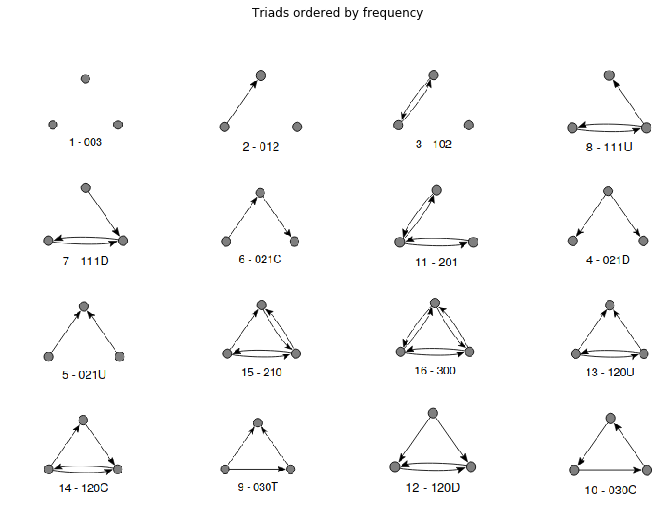

In [11]:
plt.figure(figsize=(12,8))
plt.suptitle('Triads ordered by frequency')
for i, triad in enumerate(tc_sorted):
    img = plt.imread('{}.png'.format(triad[0]))
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()
# imgs from http://vlado.fmf.uni-lj.si/pub/networks/doc/triads/triads.pdf

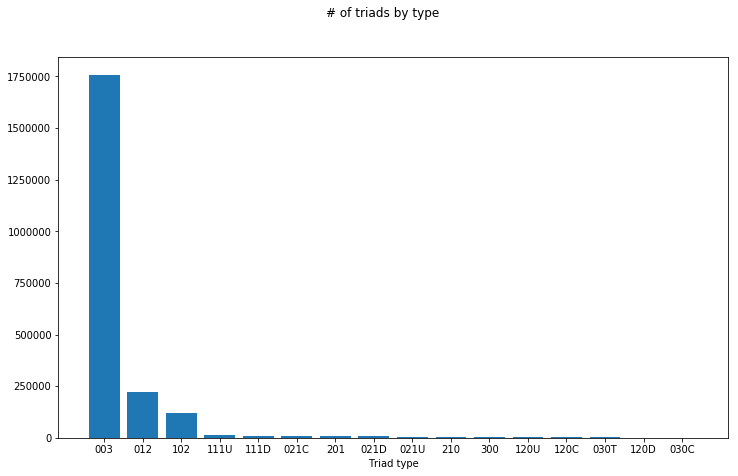

In [12]:
plt.figure(figsize=(12,7))
plt.bar(range(len(tc_sorted)), [t[1] for t in tc_sorted])
locs, labels = plt.xticks()
plt.xticks(range(len(tc.keys())), [t[0] for t in tc_sorted])
plt.xlabel('Triad type')
plt.suptitle('# of triads by type')
plt.show()

In [13]:
layout = nx.spring_layout(g)

In [14]:
color_map = []
for n in nx.nodes(g):
    if n in wcc[0]:
        if n in scc[0]:
            color_map.append('cyan')
        else:
            color_map.append('blue')
    else:
        color_map.append('magenta')

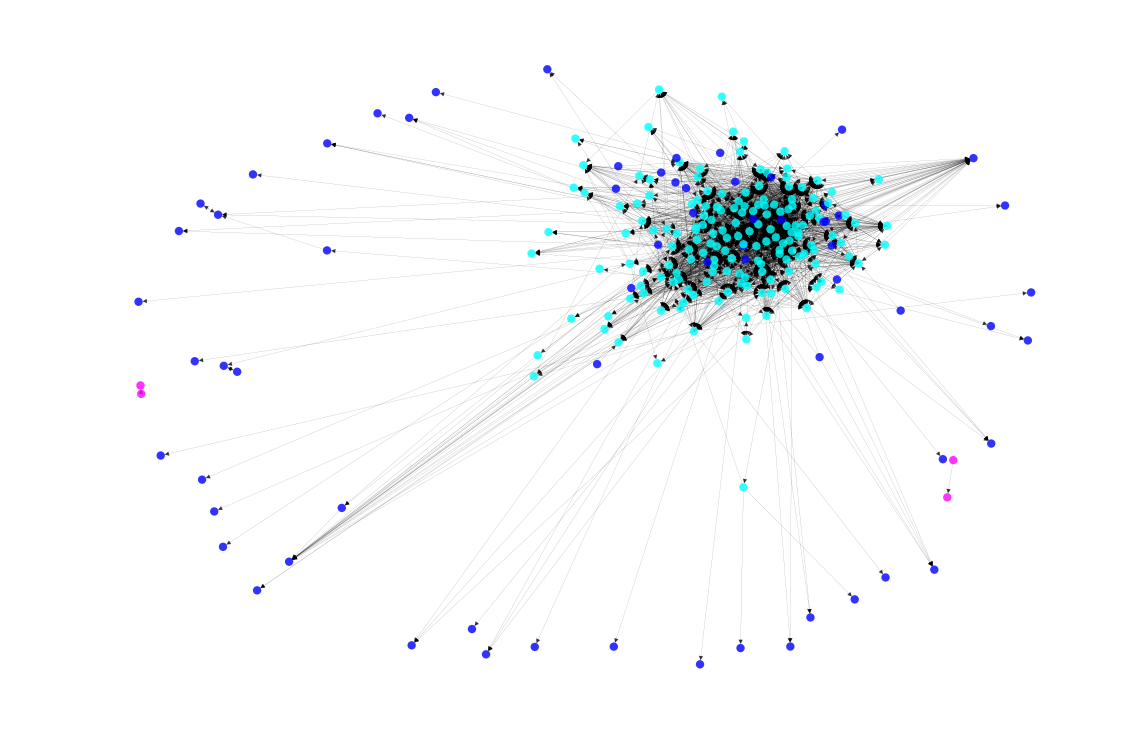

In [15]:
options = {
    'node_size': 70,
    "line_color": "grey",
    "linewidths": 0,
    "width": 0.1,
    'alpha': 0.8,
    'pos': layout,
    'node_color': color_map    
}
plt.figure(figsize=(15,10))
nx.draw(g, **options)
plt.show()

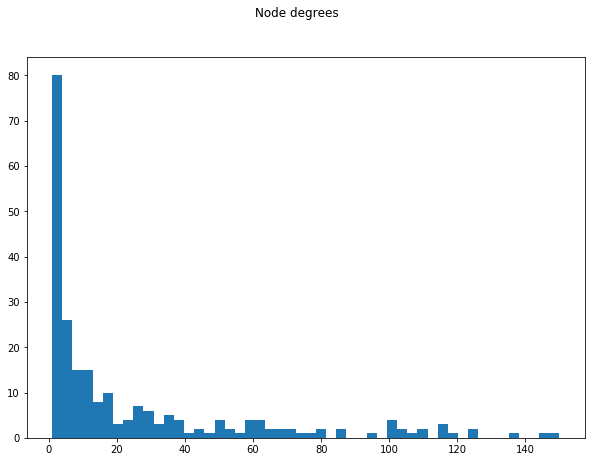

In [16]:
plt.figure(figsize=(10,7))
plt.hist(degrees, bins=50)
plt.suptitle('Node degrees')
plt.show()

In [17]:
degrees = {}
for n in nx.nodes(g):
    degrees[n] = nx.degree(g, n)

In [18]:
in_degrees = []
out_degrees = []
for u, d in g.in_degree():
    in_degrees.append(d)
for u, d in g.out_degree():
    out_degrees.append(d)

In [19]:
noise = np.random.random((2,len(out_degrees)))*0.7

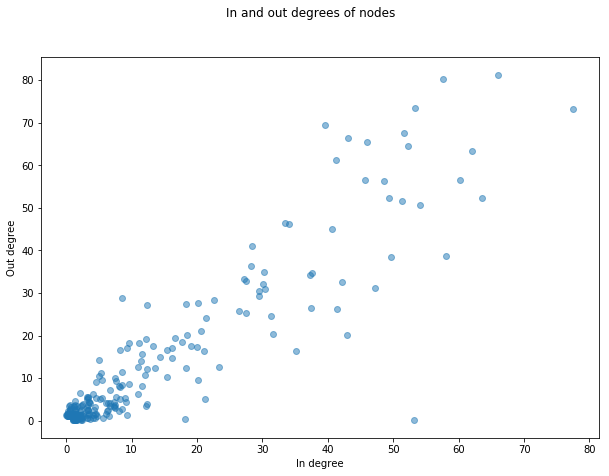

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(in_degrees+noise[0,:], out_degrees+noise[1,:], alpha=0.5)
plt.suptitle('In and out degrees of nodes')
plt.xlabel('In degree')
plt.ylabel('Out degree')
plt.show()

In [21]:
msgs = []
degrees = []
for u, d in g.degree():
    degrees.append(d)
    msgs.append(msg_counts[u])

In [22]:
noise = np.random.random((2,len(msgs)))*0.7

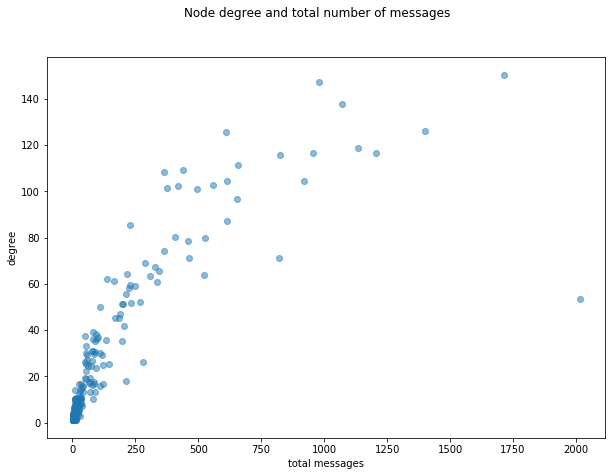

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(msgs+noise[0,:], degrees+noise[1,:], alpha=0.5)
plt.xlabel('total messages')
plt.ylabel('degree')
plt.suptitle('Node degree and total number of messages')
plt.show()